In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import h5py

import time, os, re, sys

from sklearn import utils
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split, ParameterGrid

# K-fold validation
from sklearn.model_selection import RepeatedStratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Scoring
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import imblearn
from sklearn.metrics import accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pickle

with open(r'../../Results/gr_KNN.pkl', 'rb') as file:
 
    results = pickle.load(file)
 
    
df = pd.DataFrame(results.cv_results_)

print(df.columns)
df.tail()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algorithm', 'param_leaf_size', 'param_n_neighbors',
       'param_weights', 'params', 'split0_test_f1_macro',
       'split1_test_f1_macro', 'split2_test_f1_macro', 'split3_test_f1_macro',
       'split4_test_f1_macro', 'split5_test_f1_macro', 'split6_test_f1_macro',
       'split7_test_f1_macro', 'split8_test_f1_macro', 'split9_test_f1_macro',
       'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro',
       'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy',
       'split3_test_Accuracy', 'split4_test_Accuracy', 'split5_test_Accuracy',
       'split6_test_Accuracy', 'split7_test_Accuracy', 'split8_test_Accuracy',
       'split9_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy',
       'rank_test_Accuracy', 'split0_test_AUC', 'split1_test_AUC',
       'split2_test_AUC', 'split3_test_AUC', 'split4_test_AUC',
       'split5_test_AUC', 'split6_test_AUC', 'sp

c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
163       0.166629      0.055745      2298.855677       53.368146   
164       0.196416      0.081262      2276.930198       38.544169   
165       0.218575      0.084541      2264.926551       23.233326   
166       0.209056      0.089913      2278.920243       30.118388   
167       0.221446      0.070752      2292.272654       63.847562   

    param_algorithm param_leaf_size param_n_neighbors param_weights  \
163           brute              50                15      distance   
164           brute              50                25       uniform   
165           brute              50                25      distance   
166           brute              50                50       uniform   
167           brute              50                50      distance   

                                                params  split0_test_f1_macro  \
163  {'algorithm': 'brute', 'leaf_size': 50, 'n_nei...              0.992117   
164  {'algorithm': 'brute', 'leaf_size': 50, 'n_nei...              0.991127   
165  {'algorithm': 'brute', 'leaf_size': 50, 'n_nei...              0.991295   
166  {'algorithm': 'brute', 'leaf_size': 50, 'n_nei...              0.990201   
167  {'algorithm': 'brute', 'leaf_size': 50, 'n_nei...              0.990372   

     ...  split3_test_AUC  split4_test_AUC  split5_test_AUC  split6_test_AUC  \
163  ...         0.996792         0.996748         0.996857         0.996669   
164  ...         0.997086         0.997026         0.997182         0.997034   
165  ...         0.997118         0.997057         0.997212         0.997068   
166  ...         0.997622         0.997542         0.997620         0.997413   
167  ...         0.997739         0.997659         0.997727         0.997527   

     split7_test_AUC  split8_test_AUC  split9_test_AUC  mean_test_AUC  \
163         0.996828         0.996776         0.996765       0.996772   
164         0.997125         0.997085         0.997082       0.997095   
165         0.997158         0.997118         0.997115       0.997127   
166         0.997670         0.997550         0.997582       0.997568   
167         0.997783         0.997664         0.997702       0.997683   

     std_test_AUC  rank_test_AUC  
163      0.000073             49  
164      0.000074             37  
165      0.000074             25  
166      0.000089             13  
167      0.000089              1  

[5 rows x 48 columns]

In [3]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_best = []
for metric in scoring:
    idx_best.append(df[f'rank_test_{metric}'].idxmin())
    
    
if idx_best.count(idx_best[0]) == len(idx_best):
    print("########## We have a winner! ##########")
    print("The best classificator is:")
    print(df.loc[idx_best[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]:5f}, std = {df['std_test_' + metric][1]:4f}")
else:
    print("Oh-oh there are more best estimators...")
    for i, met in zip(idx_best, scoring):
        print(f"Best classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]}, std = {df['std_test_' + metric][1]}")




Oh-oh there are more best estimators...
Best classificator for the metric f1_macro - idx 0
{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'weights': 'uniform'}
Scorer results:
- f1_macro --> Mean = 0.9961846939164397, std = 6.815728648600792e-05
- Accuracy --> Mean = 0.9961847494897536, std = 6.815430432348942e-05
- AUC --> Mean = 0.9961847494188334, std = 6.815805043245202e-05
Best classificator for the metric Accuracy - idx 0
{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'weights': 'uniform'}
Scorer results:
- f1_macro --> Mean = 0.9961846939164397, std = 6.815728648600792e-05
- Accuracy --> Mean = 0.9961847494897536, std = 6.815430432348942e-05
- AUC --> Mean = 0.9961847494188334, std = 6.815805043245202e-05
Best classificator for the metric AUC - idx 13
{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 50, 'weights': 'distance'}
Scorer results:
- f1_macro --> Mean = 0.9961846939164397, std = 6.815728648600792e-05
- Accuracy --> Mean = 0.99618474

In [4]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_worst = []
for metric in scoring:
    idx_worst.append(df[f'rank_test_{metric}'].idxmax())
    
    
if idx_worst.count(idx_worst[0]) == len(idx_worst):
    print("########## We have a loser! ##########")
    print("The worst classificator is:")
    print(df.loc[idx_worst[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]:5f}, std = {df['std_test_' + metric][1]:4f}")
else:
    print("Oh-oh there are more worst estimators...")
    for i, met in zip(idx_worst, scoring):
        print(f"Worst classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][1]}, std = {df['std_test_' + metric][1]}")



Oh-oh there are more worst estimators...
Worst classificator for the metric f1_macro - idx 12
{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 50, 'weights': 'uniform'}
Scorer results:
- f1_macro --> Mean = 0.9961846939164397, std = 6.815728648600792e-05
- Accuracy --> Mean = 0.9961847494897536, std = 6.815430432348942e-05
- AUC --> Mean = 0.9961847494188334, std = 6.815805043245202e-05
Worst classificator for the metric Accuracy - idx 12
{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 50, 'weights': 'uniform'}
Scorer results:
- f1_macro --> Mean = 0.9961846939164397, std = 6.815728648600792e-05
- Accuracy --> Mean = 0.9961847494897536, std = 6.815430432348942e-05
- AUC --> Mean = 0.9961847494188334, std = 6.815805043245202e-05
Worst classificator for the metric AUC - idx 0
{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'weights': 'uniform'}
Scorer results:
- f1_macro --> Mean = 0.9961846939164397, std = 6.815728648600792e-05
- Accuracy --> Mean = 0.996

In [4]:
dati = np.load("../Dataset/dati.npz")
X = dati["X"]
y = dati["y"]

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

# Applico la PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

thrEV = .95     # Soglia Explained Variance per pruning componenti

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature} features ")


# Pruno tenendo solo le prime componenti più informative
X_pruned = X_pca[:,:idxLastFeature]     # Pruno


To have 95.0 % of Explaied Variance, we need 7 features 


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.2, random_state=0)

In [7]:
idx = [idx_best[0], idx_best[2]]

y_pred = []
y_pred_proba = []

for i in idx:
    params = df.loc[i]['params']
    clf = KNeighborsClassifier(**params)
    clf = clf.fit(X_train, y_train)
    y_pred.append(clf.predict(X_test))
    y_pred_proba.append(clf.predict_proba(X_test)[:,1])


In [8]:
cf_matrix = []

for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix.append(metrics.confusion_matrix(y_test, y_pred[i]))
    accuracy        =   metrics.accuracy_score(y_test, y_pred[i])
    precision       =   metrics.precision_score(y_test, y_pred[i])
    recall          =   metrics.recall_score(y_test, y_pred[i])
    f1              =   metrics.f1_score(y_test, y_pred[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")


For idx = 0
-- accuracy = 0.9962
-- precision = 0.9925
-- recall = 1.0000
-- f1 = 0.9962
For idx = 13
-- accuracy = 0.9904
-- precision = 0.9811
-- recall = 1.0000
-- f1 = 0.9905


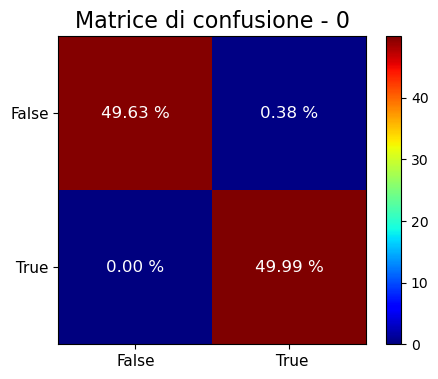

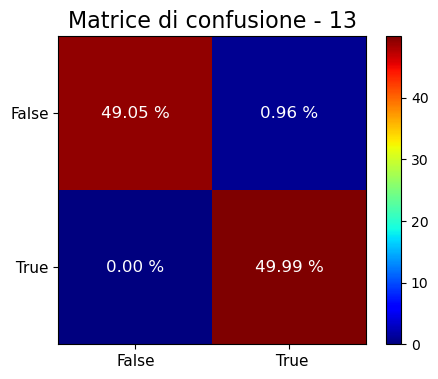

In [9]:
for i, mat in enumerate(cf_matrix):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100


    fig, ax = plt.subplots()
    fig.set_size_inches(5,4)

    # Plotto la matrice di covarianza
    im = ax.imshow(myConfMat, cmap = "jet", origin = "upper")

    ax.set_title(f"Matrice di confusione - {idx[i]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax.text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax.set_xticks((0,1))
    ax.set_xticklabels(['False',' True'], rotation='horizontal', fontsize=11)

    ax.set_yticks((0,1))
    ax.set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)

    # fig.savefig("../LATEX/FIGURE/41-conf-matrix.pdf", format = "pdf", bbox_inches = "tight")

    plt.show()

In [10]:
nrocstep = 100000                            # Numero punti per curva ROC
xROC = np.linspace(0,1,nrocstep)           # Vettore su cui interpolare curva ROC
yROC_lst = []
for i,y in enumerate(y_pred_proba):
    # *** ROC Curve ***

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y)

    # Creo un'interpolazione denza per miglior calcolo aree
    yROC = np.interp(xROC, fpr, tpr)
    yROC_lst.append(yROC)
    #myAuc = metrics.auc(fpr, tpr)
    myAUC = metrics.auc(xROC, yROC)
    print(f"{idx[i]} --> AUC = {myAUC}")


0 --> AUC = 0.9962103162985261
13 --> AUC = 0.9977366753488246


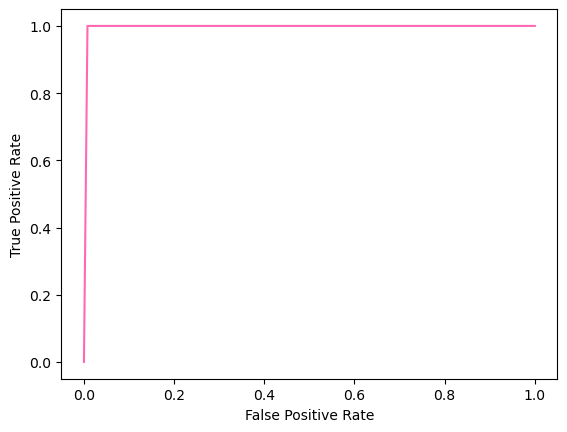

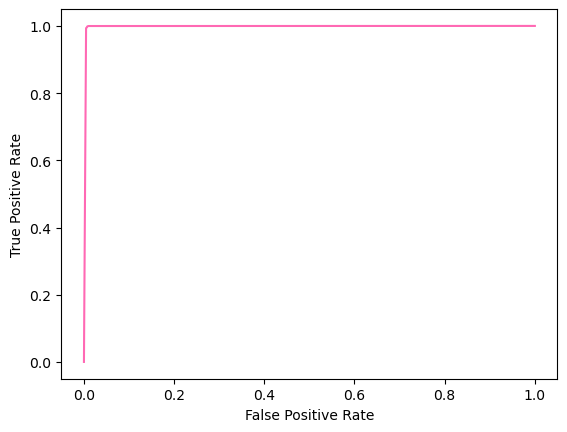

In [11]:
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

for i, yROC in enumerate(yROC_lst):

    #create ROC curve
    plt.plot(xROC,yROC, c  = "hotpink")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
